In [1]:
import pandas as pd
import networkx as nx

In [2]:
# 数据加载
df = pd.read_csv('seealsology-data.tsv',sep='\t')
print(df)

                                         source  \
0                                life insurance   
1                                life insurance   
2                                life insurance   
3                                life insurance   
4                                life insurance   
...                                         ...   
3739                              health system   
3740                              health system   
3741                      health administration   
3742                      health administration   
3743  ansi 834 enrollment implementation format   

                               target  depth  
0      corporate-owned life insurance      1  
1          critical illness insurance      1  
2                    economic capital      1  
3                     estate planning      1  
4              false insurance claims      1  
...                               ...    ...  
3739             two-tier health care      4  
3740       

In [3]:
# 构造图
G = nx.from_pandas_edgelist(df, 'source', 'target', edge_attr=True, create_using=nx.Graph())
print(G.nodes())

['life insurance', 'corporate-owned life insurance', 'critical illness insurance', 'economic capital', 'estate planning', 'false insurance claims', 'general insurance', 'internal revenue code section 79', 'life expectancy', 'pet insurance', 'retirement plan', 'return of premium life insurance', 'segregated fund', "servicemembers' group life insurance", 'term life insurance', 'tontine', 'universal life insurance', 'variable universal life insurance', 'unitised insurance fund', 'family income benefit insurance', 'permanent life insurance', 'theory of decreasing responsibility', 'whole life insurance', 'elderly care', 'financial advisor', 'fee-only financial advisor', 'generational accounting', 'pension led funding', 'pension model', 'pensions crisis', 'public debt', 'retirement', 'retirement age', 'retirement planning', 'social pension', 'ham and eggs movement', 'individual pension plan', 'pension rights center', 'roth 401(k)', 'universities superannuation scheme', 'depreciation', 'biode

In [4]:
print(len(G.nodes()))

2399


In [5]:
# 使用DeepWalk模型
from ge.models import DeepWalk
model = DeepWalk(G, walk_length=15, num_walks=8, workers=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished


In [6]:
# 模型训练
model.train(window_size=4, iter=25)
# 得到节点的embedding
embeddings = model.get_embeddings()
print(embeddings['critical illness insurance'])

Learning embedding vectors...
Learning embedding vectors done!
[ 3.31941724e-01  4.09561634e-01 -4.59533073e-02  2.29498699e-01
  5.33636153e-01  2.71633384e-03  4.25181746e-01  6.80306181e-02
  1.25017136e-01 -1.60172522e-01  3.31484258e-01 -3.37066565e-04
  2.68097490e-01  5.93196154e-01  1.77420720e-01 -6.62277266e-02
 -7.99615324e-01 -8.14506412e-02 -1.61278531e-01  1.05005666e-03
  3.41187380e-02 -3.21908414e-01  2.17379674e-01 -3.93716633e-01
  6.02088906e-02 -1.89280331e-01 -7.67436624e-01  2.50020206e-01
 -4.33594197e-01 -5.46433508e-01  4.02620845e-02  1.34155557e-01
  5.86507618e-01  3.54889035e-01  3.85334156e-02  4.44804788e-01
 -5.61542749e-01 -3.44550639e-01  7.66606569e-01 -1.67709827e-01
  2.09439471e-01 -1.89218193e-01 -1.30934134e-01  8.02545398e-02
  6.25309199e-02 -2.10851595e-01 -1.73918888e-01  1.44120485e-01
  8.03989731e-03  6.25424206e-01  6.05935574e-01  6.55446053e-02
 -9.93586302e-01  1.99238449e-01 -1.88199177e-01  3.19508284e-01
  5.32114580e-02 -3.0365797

In [7]:
# 得到word2vec model
wv = model.w2v_model
wv.wv.similar_by_word('critical illness insurance')

/opt/conda/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('total permanent disability insurance', 0.871237576007843),
 ("servicemembers' group life insurance", 0.6354345083236694),
 ('life insurance', 0.583935022354126),
 ('permanent life insurance', 0.5773440599441528),
 ('corporate-owned life insurance', 0.5754857063293457),
 ('tontine', 0.5655242800712585),
 ('term life insurance', 0.5534298419952393),
 ('internal revenue code section 79', 0.5505072474479675),
 ('health insurance in the united states', 0.5453547835350037),
 ('segregated fund', 0.5427016615867615)]

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 537 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 537 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 227 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 227 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 246 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 246 missing from current font.
  font.set_text(s, 0, flags

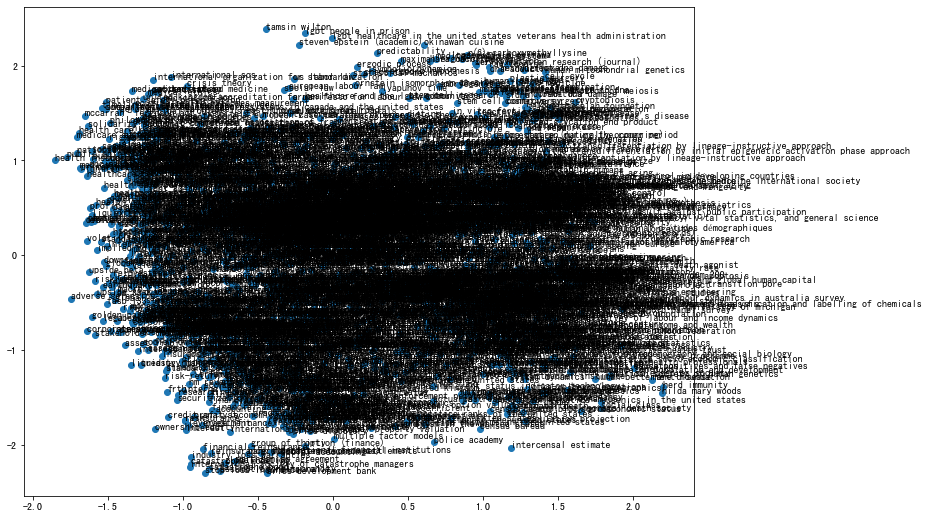

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# 在二维空间中绘制所选节点的向量
def plot_nodes(word_list):
    # 每个节点的embedding为100维
    X = []
    for item in word_list:
        X.append(embeddings[item])
    #print(X.shape)
    # 将100维向量减少到2维
    pca = PCA(n_components=2)
    result = pca.fit_transform(X) 
    #print(result)
    # 绘制节点向量
    plt.figure(figsize=(12,9))
    # 创建一个散点图的投影
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(list(word_list)):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))        
    plt.show()
    
plot_nodes(model.w2v_model.wv.vocab)